### Business Problem

The aim of this project is to build a model which tells the status of the water points (as functional, nonfunctional, functional but needs repair). With this model, we will help to the Tanzanian authorities how to use water sources as a productive way. It also helps the investment of the government on wells. 

The original data can be obtained by frm here https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/data/. Basically, there are 4 different data sets; submission format, training set, test set and train labels set which contains status of wells. With given training set and labels set, competitors are wanted to build predictive model and apply it to test set to determine status of the wells and submit.

In this project, we will use train set and train label set. Train set has 59400 water points data with 40 features. Train labels data has 59400 same water points with train set but just has information about id of these points and status of them.

#### Problem Statement
The objective of this project is to develop a predictive model that accurately classifies the status of water points in Tanzania as "functional," "nonfunctional," or "functional but needs repair." By analyzing data on 40 different features related to water points, we aim to provide Tanzanian authorities with valuable insights to make informed decisions about the productive use of water sources. Additionally, the model will assist the government in prioritizing investments for well maintenance and improvement.
 

#### Project Objectives

### Data Understanding

The above dataset has a total of 59400 records and 41 columns. The information for each column is as follows:

amount_tsh - amount allocated fot the construction of the water point.

date_recorded - the date the construction of the water point began.

funder - the funder for the water point.

gps_height - height above the reference ellipsoid that approximates the earth's surface.

installer - the installer for the water point.

longitude - geographical location of the water point.

latitude - geographical location of the water point.

wpt_name - the name of the water point.

num_private - not sure.

basin - A geographical basin.

subvillage - geographical location.

region - geographical location.

region_code - geographical location (coded).

district_code - geographical location (coded).

lga - geographical location.

ward - geographical location.

population - the total population around the water point.

public_meeting - where the meeting was held

recorded_by - the organization/group that entered a certain record.

scheme_management - who manages the water point.

scheme_name- name of one who operates the water point.

permit - if the water point is permitted or not.

construction_year - the construction year of the water point.

extraction_type - the extraction type used.

extraction_type_group - the extraction type group used.

extraction_type_class - the extraction type class used.

management - who is incharge of managing the water point.

management_group - the group in charge of managing the water point.

payment - the payment for a water point.

payment_type - the payment type for a water point.

water_quality - the water quality.

quality_group - the quality of the water.

quantity - the quantity of the water in a water point.

quantity_group - the quantity of water in a water point.

source - the source of the water for the water in the water point.

source_type - the source type for the water in the water point.

source_class - the source class for the water in the water point.

waterpoint_type - the water point type.

status_group - the status of the water point.

In [1]:
#importing relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('training set values.csv')
test =  pd.read_csv('test set values.csv')
df.head(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
df1 = pd.read_csv('training _set_labels.csv')
df1.head(5)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
 # setting id as an index to train set
df.set_index('id',inplace=True)

In [5]:
 # setting id as an index to train labels
df1.set_index('id',inplace=True)

In [6]:
#merging two data sets
df = pd.merge(df, df1, how = 'inner', left_index = True,right_index=True) 
df.head(5)

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [7]:
#shape of the training and testing data
print("Train:",df.shape,"Test:",test.shape)

Train: (59400, 40) Test: (14850, 40)


In [8]:
#getting information about the training data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [9]:
#statistical summary
df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [10]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

## Data Cleaning

In [11]:
#checking for missing values in the training set
df.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

### funder column

In [12]:
# filling 0 and null values with unknown
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [13]:
df['funder'].value_counts().head(60)

Government Of Tanzania            9084
Unknown                           4416
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
Kkkt                              1287
World Vision                      1246
Unicef                            1057
Tasaf                              877
District Council                   843
Dhv                                829
Private Individual                 826
Dwsp                               811
Norad                              765
Germany Republi                    610
Tcrs                               602
Ministry Of Water                  590
Water                              583
Dwe                                484
Netherlands                        470
Hifab                              450
Adb                                448
Lga                                442
Amref                              425
Fini Water               

This column is highly categorical column with thousands different values. So, we will take most common 20 values for future encoding.

In [14]:
df1 = df.loc[df['funder']== 'Government Of Tanzania']
df2 = df.loc[df['funder']== 'Unknown']              
df3 = df.loc[df['funder']== 'Danida'] 
df4 = df.loc[df['funder']== 'Hesawa'] 
df5 = df.loc[df['funder']== 'Rwssp'] 
df6 = df.loc[df['funder']== 'World Bank'] 
df7 = df.loc[df['funder']== 'Kkkt'] 
df8 = df.loc[df['funder']== 'World Vision']
df9 = df.loc[df['funder']== 'Unicef'] 
df10 = df.loc[df['funder']== 'Tasaf'] 
df11 = df.loc[df['funder']== 'District Council'] 
df12 = df.loc[df['funder']== 'Dhv'] 
df13 = df.loc[df['funder']== 'Private Individual'] 
df14 = df.loc[df['funder']== 'Dwsp'] 
df15 = df.loc[df['funder']== 'Norad'] 
df16 = df.loc[df['funder']== 'Germany Republi']
df17 = df.loc[df['funder']== 'Tcrs']
df18 = df.loc[df['funder']== 'Ministry Of Water']
df19 = df.loc[df['funder']== 'Water']
df20 = df.loc[df['funder']== 'Dwe']

df_funder = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,
                          df13,df14,df15,df16,df17,df18,df19,df20], ignore_index=True)

[Text(0, 0, 'Government Of Tanzania'),
 Text(1, 0, 'Unknown'),
 Text(2, 0, 'Danida'),
 Text(3, 0, 'Hesawa'),
 Text(4, 0, 'Rwssp'),
 Text(5, 0, 'World Bank'),
 Text(6, 0, 'Kkkt'),
 Text(7, 0, 'World Vision'),
 Text(8, 0, 'Unicef'),
 Text(9, 0, 'Tasaf'),
 Text(10, 0, 'District Council'),
 Text(11, 0, 'Dhv'),
 Text(12, 0, 'Private Individual'),
 Text(13, 0, 'Dwsp'),
 Text(14, 0, 'Norad'),
 Text(15, 0, 'Germany Republi'),
 Text(16, 0, 'Tcrs'),
 Text(17, 0, 'Ministry Of Water'),
 Text(18, 0, 'Water'),
 Text(19, 0, 'Dwe')]

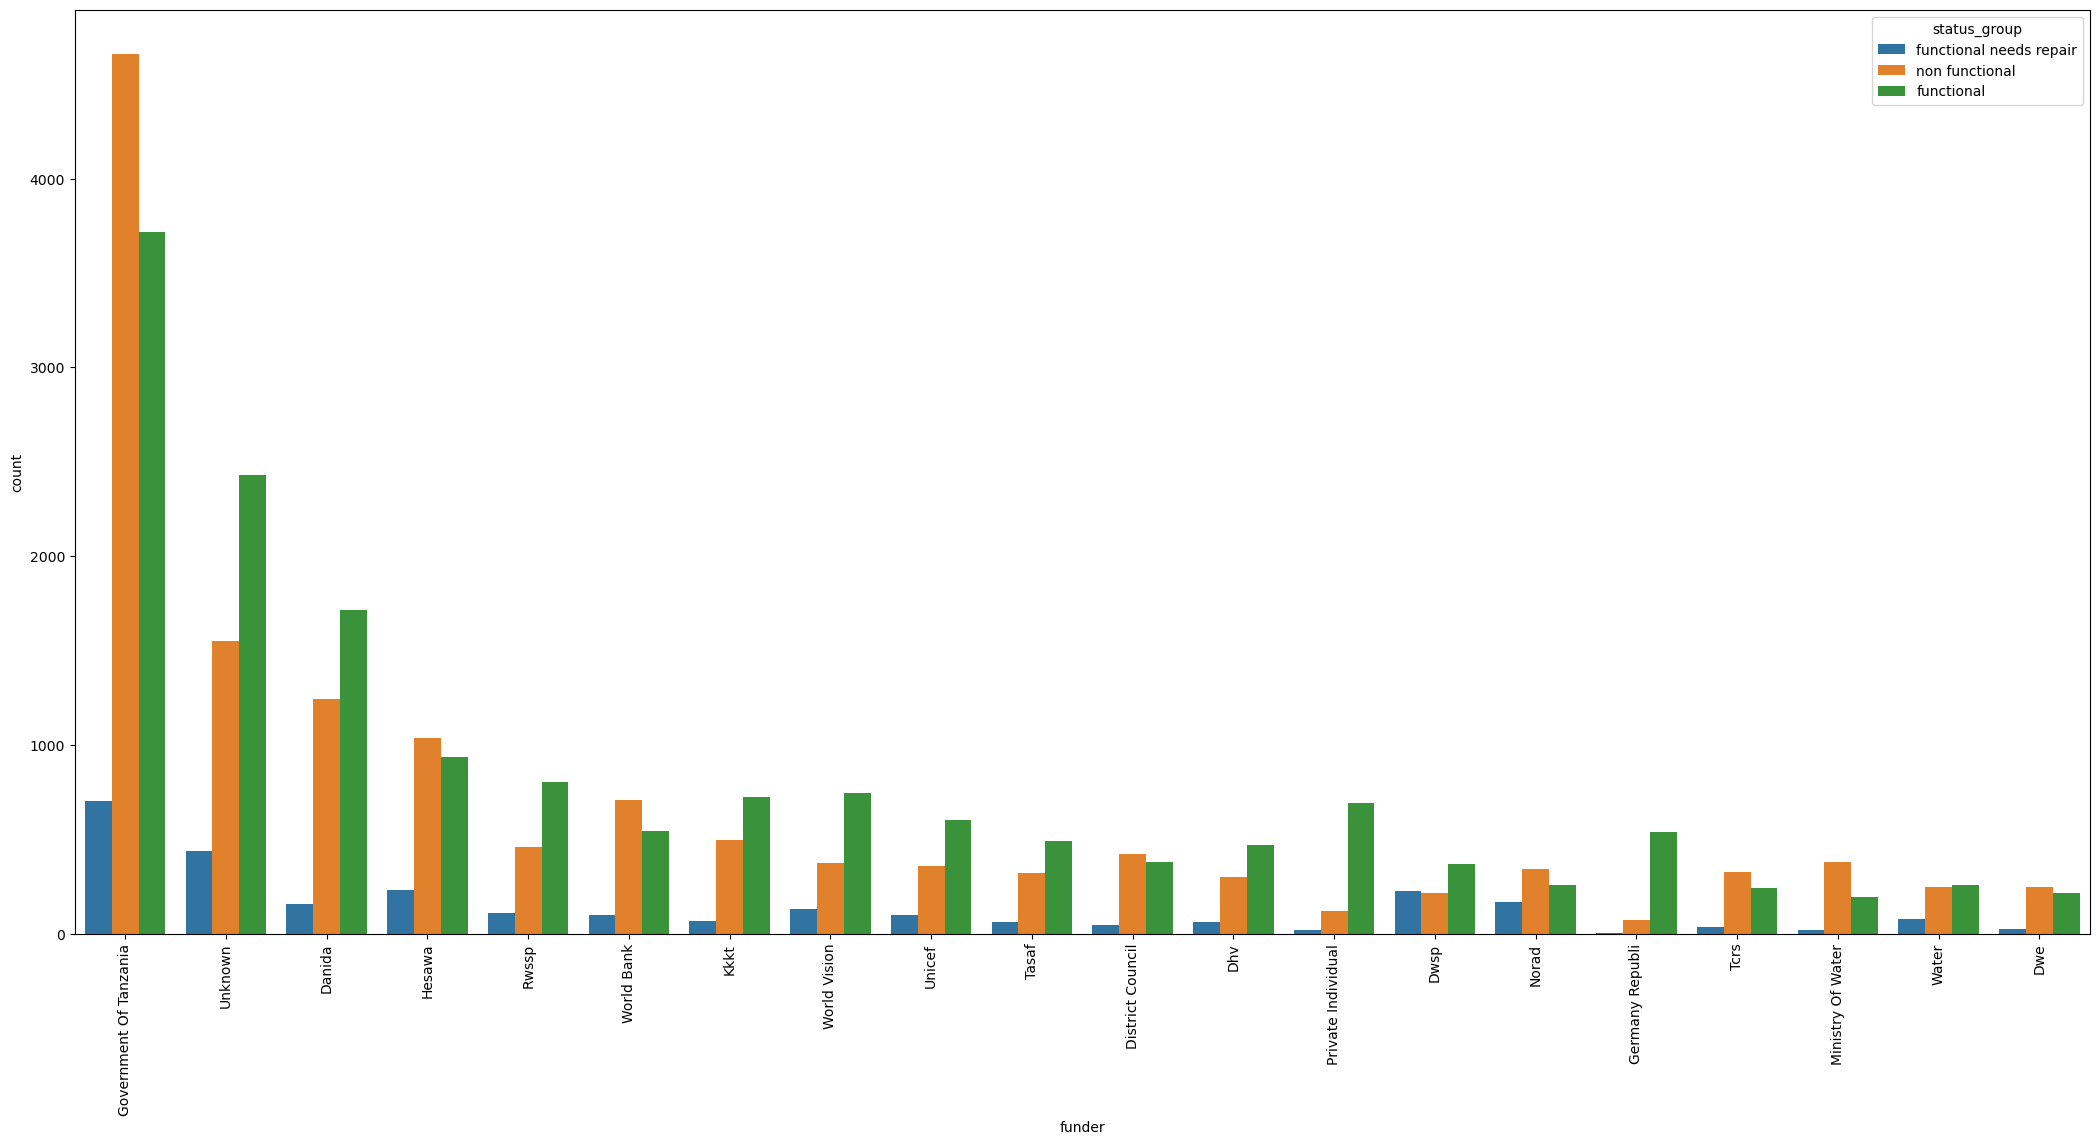

In [15]:
plt.figure(figsize=(26,12))
ax = sns.countplot(x='funder', hue="status_group", data=df_funder)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

From this we can see that most of the water points which funded by government are non-functional.

### installer column

In [16]:
# filling null values with unknown
df['installer'].fillna(value='Unknown',inplace=True)  

In [17]:
# filling 0 values with unknown
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) 

In [18]:
df['installer'].value_counts().head(60)

DWE                           17402
Unknown                        4435
Government                     1825
RWE                            1206
Commu                          1060
DANIDA                         1050
KKKT                            898
Hesawa                          840
TCRS                            707
Central government              622
CES                             610
Community                       553
DANID                           552
District Council                551
HESAWA                          539
LGA                             408
World vision                    408
WEDECO                          397
TASAF                           396
District council                392
Gover                           383
AMREF                           329
TWESA                           316
WU                              301
Dmdd                            287
ACRA                            278
World Vision                    270
SEMA                        

#####  Trying to look at the coloumns with almost similar names to see if they have the same values
###### scheme_management and management

In [19]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [20]:
df['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

These two columns has nearly same information.The "management scheme" column covers all the categories present in the "management" column and provides additional unique categories like "SWC" and "Trust." Retaining the "management scheme" column allows you to capture a broader range of management types and avoid losing any distinct information and hence I will drop management to avoid redudancy.

In [21]:
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

##### quantity / quantity_group columns 

In [22]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [23]:
df['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

 To maintain data simplicity and reduce redundancy, you can drop either "quantity" or "quantity_group" since they contain the same information with identical categories and value counts and hence I decided to drop quantity group.

####  source / source_type / source_class columns

In [24]:
df['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [25]:
df['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [26]:
df['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [27]:
# to see how many sub-groups have in source_class according to source column
df.groupby(['source_class','source']).count()

amount_tsh  date_recorded  funder  \
source_class source                                                    
groundwater  hand dtw                     874            874     874   
             machine dbh                11075          11075   11075   
             shallow well               16824          16824   16824   
             spring                     17021          17021   17021   
surface      dam                          656            656     656   
             lake                         765            765     765   
             rainwater harvesting        2295           2295    2295   
             river                       9612           9612    9612   
unknown      other                        212            212     212   
             unknown                       66             66      66   

                                   gps_height  installer  longitude  latitude  \
source_class source                                                             
groundwater  hand dtw                     874        874        874       874   
             machine dbh                11075      11075      11075     11075   
             shallow well               16824      16824      16824     16824   
             spring                     17021      17021      17021     17021   
surface      dam                          656        656        656       656   
             lake                         765        765        765       765   
             rainwater harvesting        2295       2295       2295      2295   
             river                       9612       9612       9612      9612   
unknown      other                        212        212        212       212   
             unknown                       66         66         66        66   

                                   wpt_name  num_private  basin  ...  payment  \
source_class source                                              ...            
groundwater  hand dtw                   874          874    874  ...      874   
             machine dbh              11075        11075  11075  ...    11075   
             shallow well             16824        16824  16824  ...    16824   
             spring                   17021        17021  17021  ...    17021   
surface      dam                        656          656    656  ...      656   
             lake                       765          765    765  ...      765   
             rainwater harvesting      2295         2295   2295  ...     2295   
             river                     9612         9612   9612  ...     9612   
unknown      other                      212          212    212  ...      212   
             unknown                     66           66     66  ...       66   

                                   payment_type  water_quality  quality_group  \
source_class source                                                             
groundwater  hand dtw                       874            874            874   
             machine dbh                  11075          11075          11075   
             shallow well                 16824          16824          16824   
             spring                       17021          17021          17021   
surface      dam                            656            656            656   
             lake                           765            765            765   
             rainwater harvesting          2295           2295           2295   
             river                         9612           9612           9612   
unknown      other                          212            212            212   
             unknown                         66             66             66   

                                   quantity  quantity_group  source_type  \
source_class source                                                        
groundwater  hand dtw                   874             874          874   
             machine db

"We have recognized that the three columns, namely 'source_class,' 'source_type,' and 'source,' contain the same information. After careful consideration, we have decided to retain only the 'source' column due to its more detailed information, and we will proceed to drop the other two redundant columns."

#### water_quality / quality_group columns 

In [28]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [29]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

We are going to drop 'quality_group' since water_quality has more unique values.

#### payment / payment_type columns

In [30]:
df['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [31]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

Since the two columns are similar we decided to drop the payment type 

#### extraction_type / extraction_type_group / extraction_type_class columns

In [32]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [33]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [34]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [35]:
# to see how many sub-groups are in extraction_type_clas according to extraction_type_group
df.groupby(['extraction_type_class','extraction_type_group']).count()

amount_tsh  date_recorded  \
extraction_type_class extraction_type_group                              
gravity               gravity                     26780          26780   
handpump              afridev                      1770           1770   
                      india mark ii                2400           2400   
                      india mark iii                 98             98   
                      nira/tanira                  8154           8154   
                      other handpump                364            364   
                      swn 80                       3670           3670   
motorpump             mono                         2865           2865   
                      other motorpump               122            122   
other                 other                        6430           6430   
rope pump             rope pump                     451            451   
submersible           submersible                  6179           6179   
wind-powered          wind-powered                  117            117   

                                             funder  gps_height  installer  \
extraction_type_class extraction_type_group                                  
gravity               gravity                 26780       26780      26780   
handpump              afridev                  1770        1770       1770   
                      india mark ii            2400        2400       2400   
                      india mark iii             98          98         98   
                      nira/tanira              8154        8154       8154   
                      other handpump            364         364        364   
                      swn 80                   3670        3670       3670   
motorpump             mono                     2865        2865       2865   
                      other motorpump           122         122        122   
other                 other                    6430        6430       6430   
rope pump             rope pump                 451         451        451   
submersible           submersible              6179        6179       6179   
wind-powered          wind-powered              117         117        117   

                                             longitude  latitude  wpt_name  \
extraction_type_class extraction_type_group                                  
gravity               gravity                    26780     26780     26780   
handpump              afridev                     1770      1770      1770   
                      india mark ii               2400      2400      2400   
                      india mark iii                98        98        98   
                      nira/tanira                 8154      8154      8154   
                      other handpump               364       364       364   
                      swn 80                      3670      3670      3670   
motorpump             mono                        2865      2865      2865   
                      other motorpump              122       122       122   
other                 other                       6430      6430      6430   
rope pump             rope pump                    451       451       451   
submersible           submersible                 6179      6179      6179   
wind-powered          wind-powered                 117       117       117   

                                             num_private  basin  ...  \
extraction_type_class extraction_type_group                      ...   
gravity               gravity                      26780  26780  ...   
handpump              afridev                       1770   1770  ...   
                      india mark ii                 2400   2400  ...   
                      india mark iii                  98     98  ...   
                      nira/tanira                   8154   8154  ...   
                      other handpump                 364    364  ...   
                

It is obviously seen that these three columns keep same information. So, we decided to keep 'extraction_type_group' and drop others. Although, extraction_type has more unique values than extraction_type_group , some of these values are very small amount according to this big dataset. We prefered to use more compact one. Also, extraction_type_class contains less detail. So, extraction_type_group is chosen to keep.

### waterpoint_type / waterpoint_type_group

In [36]:
df['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [37]:
df['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

We decided to keep 'waterpoint_type' which contains more unique values

#### recorded_by column

In [38]:
df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

This coloumn has only one unique value and hence won't help us with our analysis there for we shall drop it.

### wpt_name / scheme_name / id/ region/ region_code columns

In [39]:
df['wpt_name'].value_counts()

none                       3563
Shuleni                    1748
Zahanati                    830
Msikitini                   535
Kanisani                    323
                           ... 
Kwa Medadi                    1
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 37400, dtype: int64

In [40]:
df['scheme_name'].value_counts()

K                       682
None                    644
Borehole                546
Chalinze wate           405
M                       400
                       ... 
Mradi wa maji Vijini      1
Villagers                 1
Magundi water supply      1
Saadani Chumv             1
Mtawanya                  1
Name: scheme_name, Length: 2696, dtype: int64

In [41]:
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

When we checked the wpt_name, scheme_name and id columns, they do not have any information about functionality. So, we decide to drop them. We dropped also region_code column because region column gives more information about the region. Also, before dropping columns we check the dublicated values in dataframe.

### amount_tsh column

In [42]:
df['amount_tsh'].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
6300.0          1
120000.0        1
138000.0        1
350000.0        1
59.0            1
Name: amount_tsh, Length: 98, dtype: int64

In [43]:
df.loc[df['amount_tsh']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,
functional,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706,...,19706,19706,19706,19706,19706,19706,19706,19706,19706,19706
functional needs repair,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,...,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
non functional,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885,...,18885,18885,18885,18885,18885,18885,18885,18885,18885,18885


In [44]:
df['amount_tsh'].value_counts()/df['amount_tsh'].count()

0.0         0.700993
500.0       0.052222
50.0        0.041616
1000.0      0.025051
20.0        0.024630
              ...   
6300.0      0.000017
120000.0    0.000017
138000.0    0.000017
350000.0    0.000017
59.0        0.000017
Name: amount_tsh, Length: 98, dtype: float64

We decided to drop this column because 70% of the column has no informative values. So, this column will not give idea to our model and we will drop it.

### gps_height column

In [45]:
df.groupby('status_group')[['gps_height']].mean()

,gps_height
status_group,
functional,740.131188
functional needs repair,627.607135
non functional,574.464774


In [46]:
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
 1290       52
         ...  
 2378        1
-54          1
 2057        1
 2332        1
 2366        1
Name: gps_height, Length: 2428, dtype: int64

In [47]:
df['gps_height'].value_counts()/df['gps_height'].count()

 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
 1290    0.000875
           ...   
 2378    0.000017
-54      0.000017
 2057    0.000017
 2332    0.000017
 2366    0.000017
Name: gps_height, Length: 2428, dtype: float64

Gps height shows the level of the water point from sea level. There are 34% zero values but maybe 34% of the water points are at the sea level so we do not change this column now.

### population column

In [48]:
df['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
6330        1
5030        1
656         1
948         1
788         1
Name: population, Length: 1049, dtype: int64

In [49]:
df.loc[df['population']==0].groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,
functional,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274,...,11274,11274,11274,11274,11274,11274,11274,11274,11274,11274
functional needs repair,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775,...,1775,1775,1775,1775,1775,1775,1775,1775,1775,1775
non functional,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332,...,8332,8332,8332,8332,8332,8332,8332,8332,8332,8332


In [50]:
population_counts_by_status = df.loc[df['population'] == 0].groupby('status_group')['population'].value_counts()
print(population_counts_by_status)

status_group             population
functional               0             11274
functional needs repair  0              1775
non functional           0              8332
Name: population, dtype: int64


Some functional water points has zero population, it is weird so we will change zero population to mean.

In [51]:
# to see without zero mean and median
df.loc[df['population']!=0].describe() 

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000,38019.000000
mean,447.787681,969.889634,36.074387,-6.139781,0.740788,16.076988,6.299456,281.087167,1961.399721
std,3706.770967,612.544787,2.586779,2.737733,15.288297,21.597996,11.303334,564.687660,263.994165
min,0.000000,-90.000000,29.607122,-11.649440,0.000000,2.000000,1.000000,1.000000,0.000000
25%,0.000000,347.000000,34.715340,-8.388839,0.000000,4.000000,2.000000,40.000000,1986.000000
50%,0.000000,1135.000000,36.706815,-5.750877,0.000000,10.000000,3.000000,150.000000,2000.000000
75%,100.000000,1465.000000,37.940149,-3.597016,0.000000,16.000000,5.000000,324.000000,2008.000000
max,350000.000000,2770.000000,40.345193,-1.042375,1776.000000,99.000000,67.000000,30500.000000,2013.000000


In [52]:
#changing 0's to mean
df['population'].replace(to_replace = 0 , value =281, inplace=True) 

In [53]:
df.sort_values(by='population', ascending=False).head(50).groupby('status_group').count()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
status_group,,,,,,,,,,,,,,,,,,,,,
functional,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
functional needs repair,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
non functional,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7


To see the most populated areas water point functionality , we choose crowded 50 values and did groupby. It shows that higher population areas have more functional water points.

### num_private column

In [54]:
df['num_private'].value_counts()

0       58643
6          81
1          73
5          46
8          46
        ...  
42          1
23          1
136         1
698         1
1402        1
Name: num_private, Length: 65, dtype: int64

This column has no information about it and also mostly have zero values. So, we drop this also.

### basin column

In [55]:
df['basin'].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

### subvillage column

In [56]:
#number of unique values
df['subvillage'].nunique()

19287

This column has location value of water point regions but we already have region column. We will drop this, because it is hard to handle this 19287 unique object values.

### public_meeting column

In [57]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [58]:
df['public_meeting'].fillna(value=True,inplace=True)

There are some null values and we convert them to most common data.

### Converting Target to Ternary Values

In [59]:
target_status_group = {'functional':0, 
                   'non functional': 2, 
                   'functional needs repair': 1} 
df['status_group'] = df['status_group'].replace(target_status_group)

In [60]:
df['status_group'].value_counts()

0    32259
2    22824
1     4317
Name: status_group, dtype: int64

Now that we have gone through out data we can drop the irrelevant data before proceeding eploratory data analysis

In [61]:
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [64]:
# Dropping irrelevant columns
columns_to_drop = ['amount_tsh', 'date_recorded', 'wpt_name', 'num_private', 'subvillage', 'region_code', 'scheme_management', 'extraction_type', 'extraction_type_class', 'management', 'payment_type', 'quality_group', 'source_type', 'waterpoint_type_group']

df.drop(columns=columns_to_drop, inplace=True)


In [65]:
df.head(10)

,funder,gps_height,installer,longitude,latitude,basin,region,district_code,lga,ward,...,extraction_type_group,management_group,payment,water_quality,quantity,quantity_group,source,source_class,waterpoint_type,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,5,Ludewa,Mundindi,...,gravity,user-group,pay annually,soft,enough,enough,spring,groundwater,communal standpipe,0
8776,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,2,Serengeti,Natta,...,gravity,user-group,never pay,soft,insufficient,insufficient,rainwater harvesting,surface,communal standpipe,0
34310,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,4,Simanjiro,Ngorika,...,gravity,user-group,pay per bucket,soft,enough,enough,dam,surface,communal standpipe multiple,0
67743,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,Nanyumbu,...,submersible,user-group,never pay,soft,dry,dry,machine dbh,groundwater,communal standpipe multiple,2
19728,Action In A,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,1,Karagwe,Nyakasimbi,...,gravity,other,never pay,soft,seasonal,seasonal,rainwater harvesting,surface,communal standpipe,0
9944,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Tanga,8,Mkinga,Moa,...,submersible,user-group,pay per bucket,salty,enough,enough,other,unknown,communal standpipe multiple,0
19816,Dwsp,0,DWSP,33.362410,-3.766365,Internal,Shinyanga,3,Shinyanga Rural,Samuye,...,swn 80,user-group,never pay,soft,enough,enough,machine dbh,groundwater,hand pump,2
54551,Rwssp,0,DWE,32.620617,-4.226198,Lake Tanganyika,Shinyanga,3,Kahama,Chambo,...,nira/tanira,user-group,unknown,milky,enough,enough,shallow well,groundwater,hand pump,2
53934,Wateraid,0,Water Aid,32.711100,-5.146712,Lake Tanganyika,Tabora,6,Tabora Urban,Itetemia,...,india mark ii,user-group,never pay,salty,seasonal,seasonal,machine dbh,groundwater,hand pump,2


In [66]:
df.shape

(59400, 26)

### Cleaning Process

* The data has lots of null values, missing values and unnecessary dublicated features. Two main challanges are in this project is cleaning data and handling highly imbalanced target labels.
*  Some columns which have same information were dropped. Null, wrong and missing values changed to mean, median or unknown. 

With this done we will move on to the exploration

# EXPLORATORY DATA ANALYSIS

We will first take a look at the distribution of our target variable (status_group)

0    32259
2    22824
1     4317
Name: status_group, dtype: int64


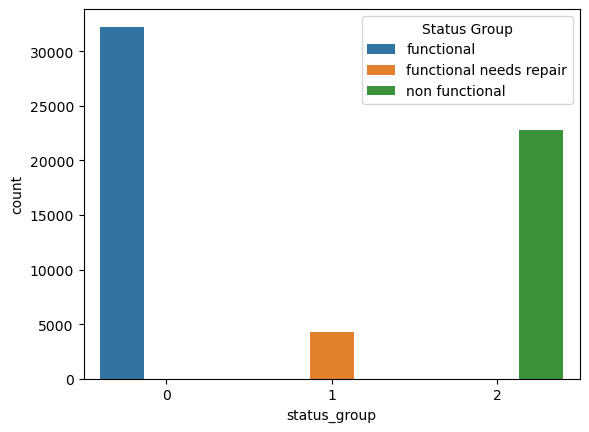

In [67]:
# Mapping numerical values to corresponding string labels
status_group_labels = {
    0: 'functional',
    1: 'functional needs repair',
    2: 'non functional'
}

# Count of status_group (target variable)
print(df['status_group'].value_counts())

# Plotting countplot with hue and custom legend labels
sns.countplot(data=df, x='status_group', hue='status_group')
plt.legend(title='Status Group', labels=status_group_labels.values())
plt.show()

From this we can note that most of the water points are functional but there is also a good number of nonfunctional waterpoints.

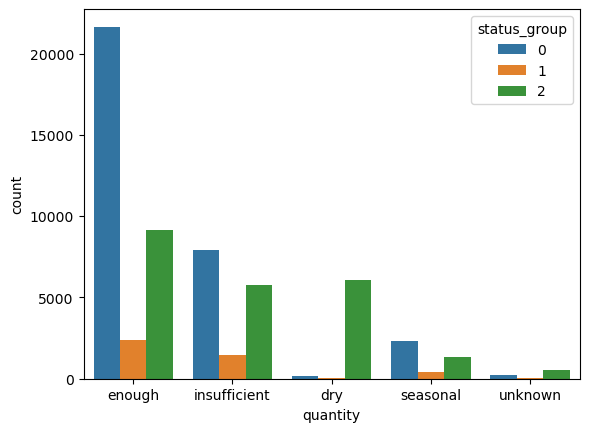

In [68]:
#lets take a look at the distribution of the quantity of the water
ax = sns.countplot(x='quantity', hue="status_group", data=df)

It can be seen that although there are enough water quantity in some waterpoints, they are non-functional. When looking at this graph, dry quantity water points have a highly correlation with non-functionality. If the water point is dry or unknown, there is high chance the water point is non functional. On the other hand, if the quantity is enough, there is a higher chance to find functional water points.

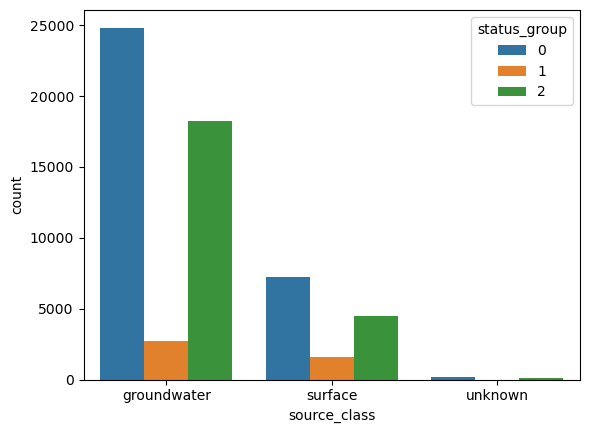

In [69]:
#distribution of source of water
ax = sns.countplot(x='source_class', hue="status_group", data=df)

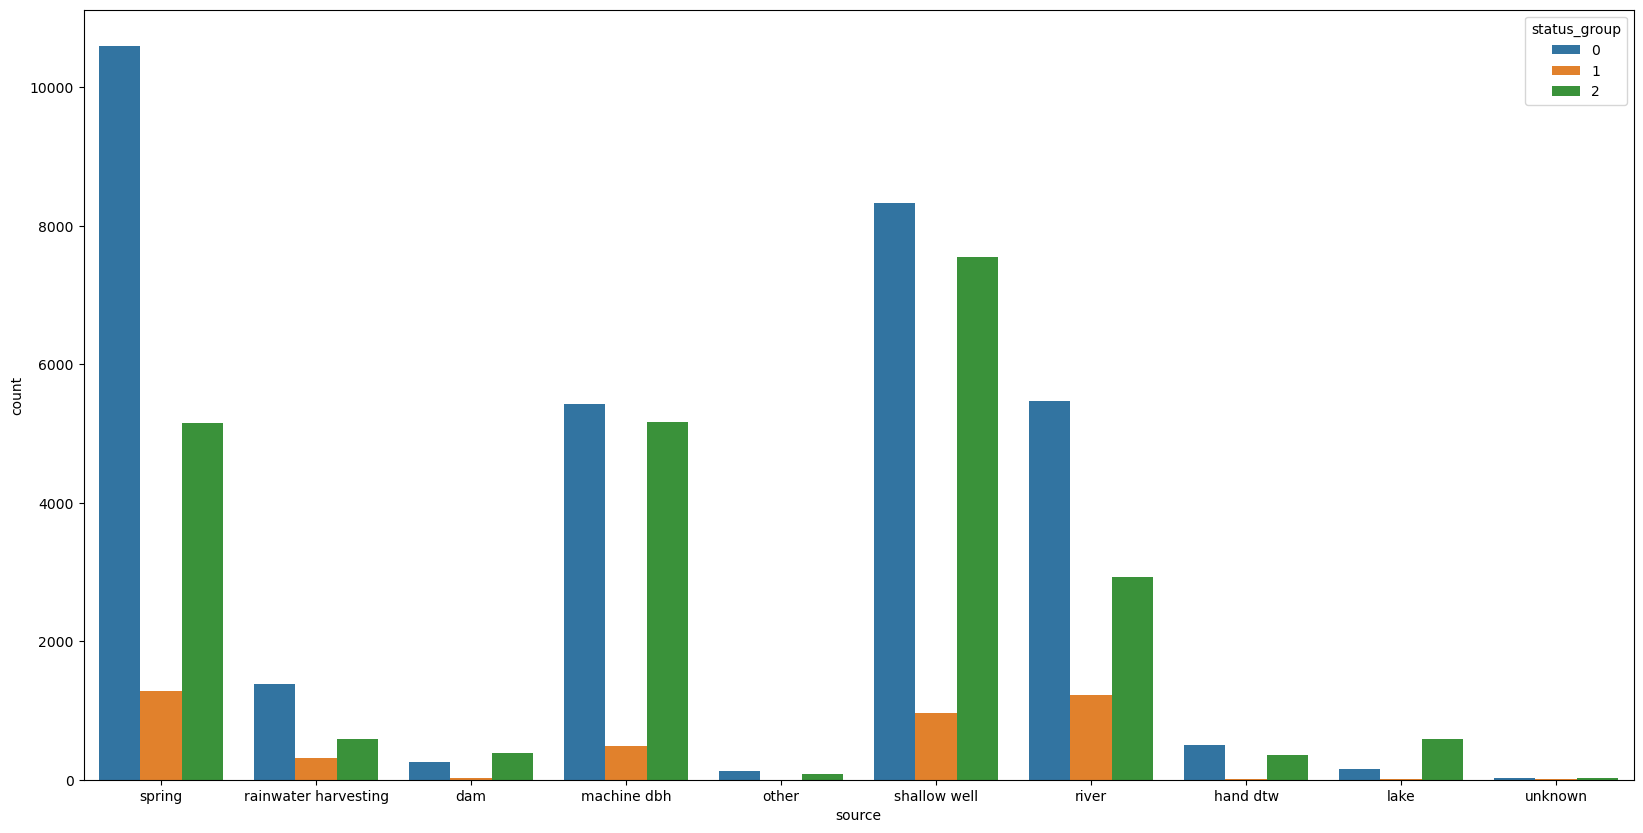

In [70]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='source', hue="status_group", data=df)

When we look at the columns, there are lots of non-functional ground water. 

In source shallow wells have the highest number of non functional wells the spring and machine_dhb have almost the same number of nonfunctional wells.

Spring has the highest number of fuctional wells followed by shallow wells both of which are in the category of shallow water


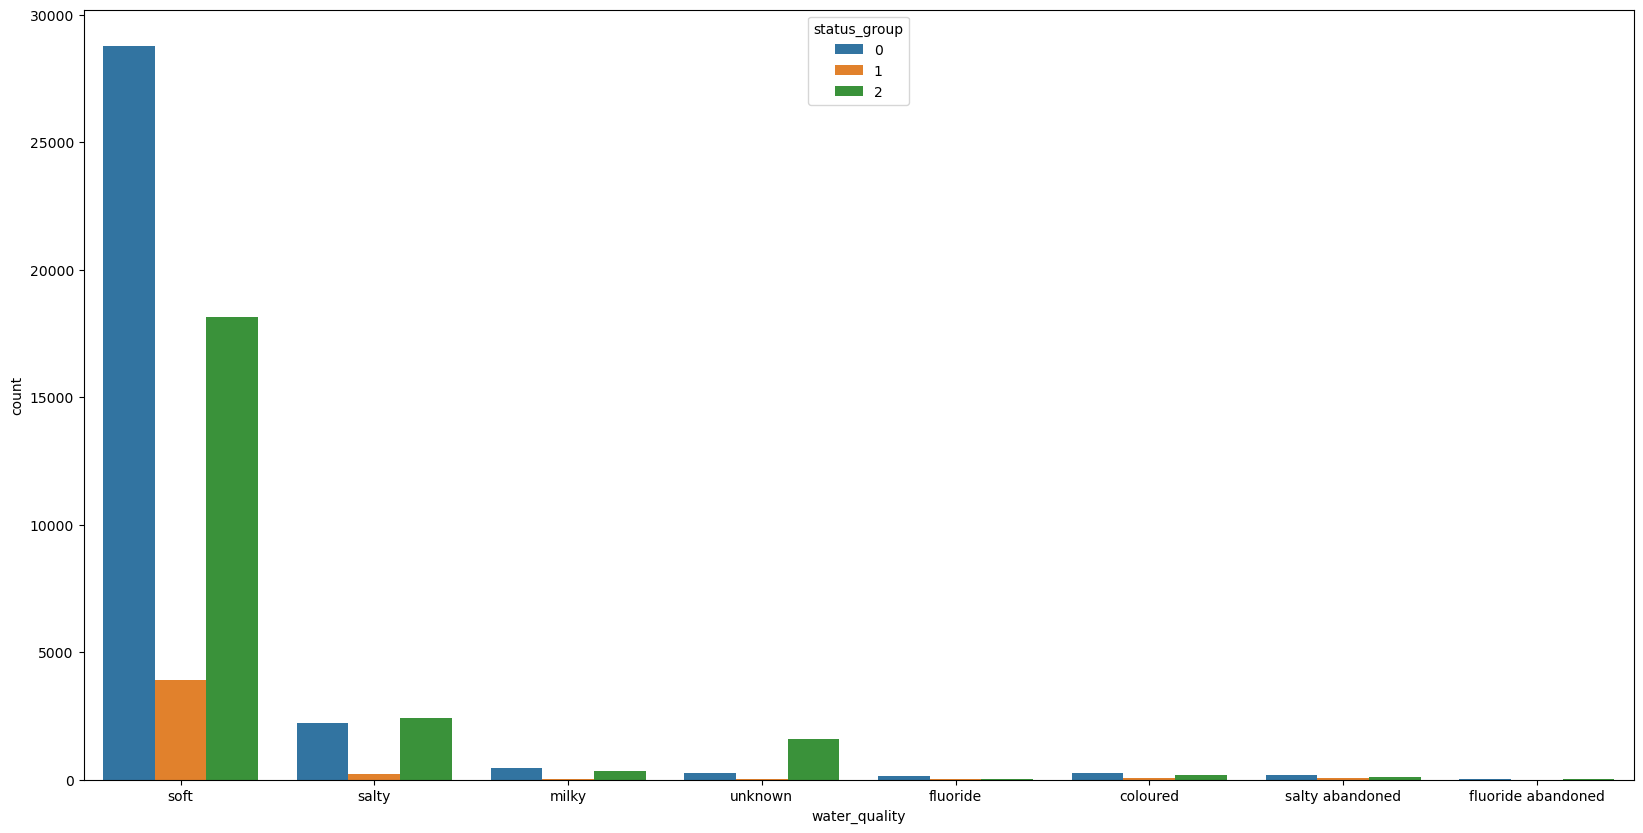

In [71]:
#Looking at the distribution of water quality
plt.figure(figsize=(20,10))
ax = sns.countplot(x='water_quality', hue="status_group", data=df)

Soft water has the highest number of both function and non functional wells compared to the others followed by salty where it has a higher number of nonfunctional lakes than functional lakes.

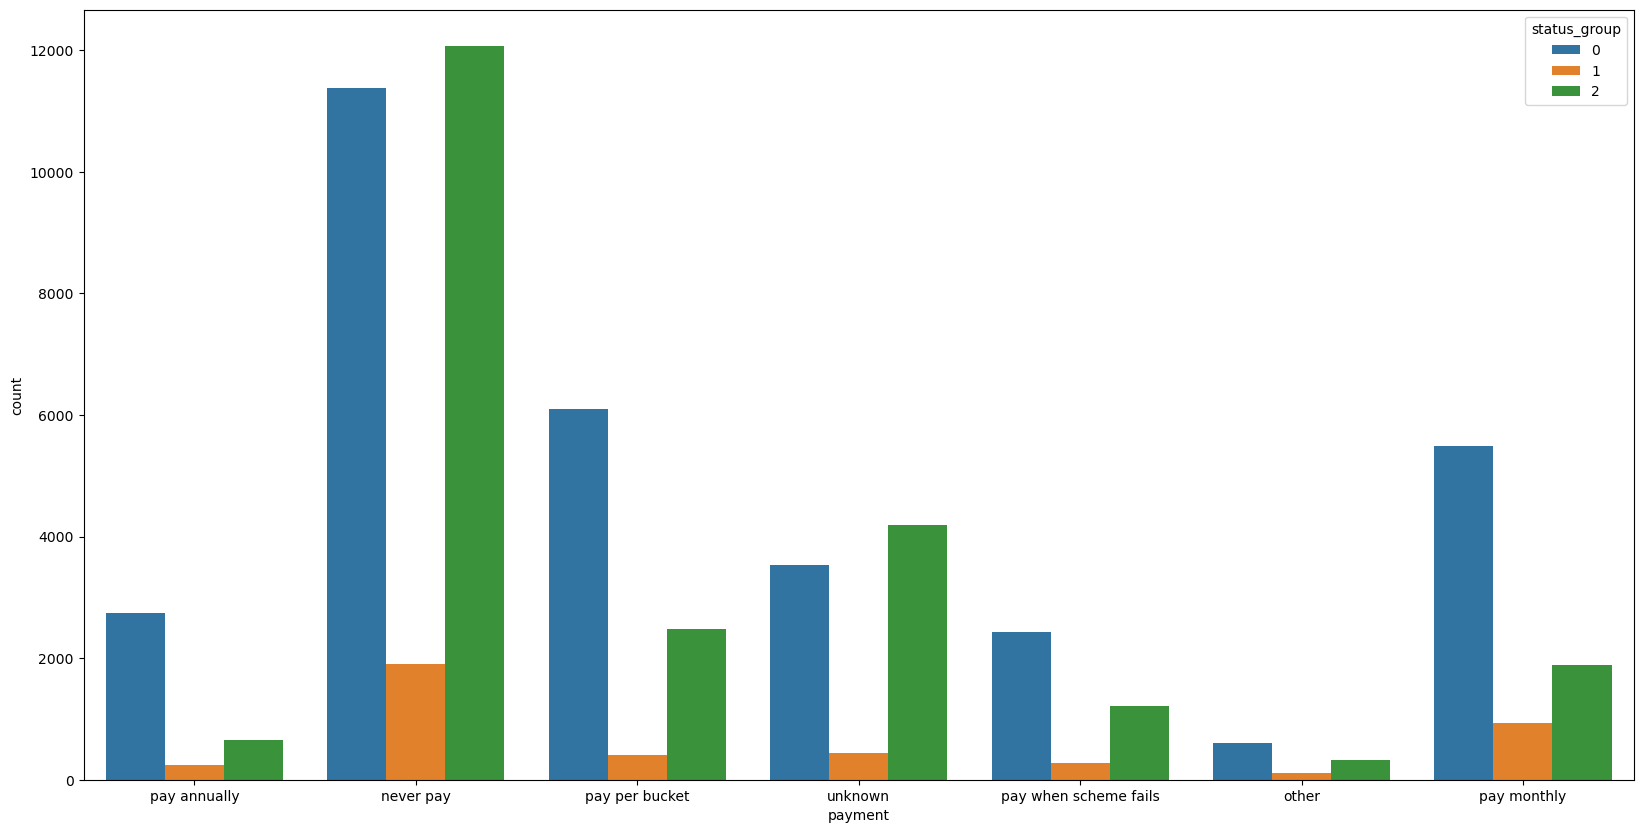

In [72]:
# distribution of the payments
plt.figure(figsize=(20,10))
ax = sns.countplot(x='payment', hue="status_group", data=df)

The water points that are free(never pay) has the highest number of non functional waterpoints this might be because its the most used as it is free

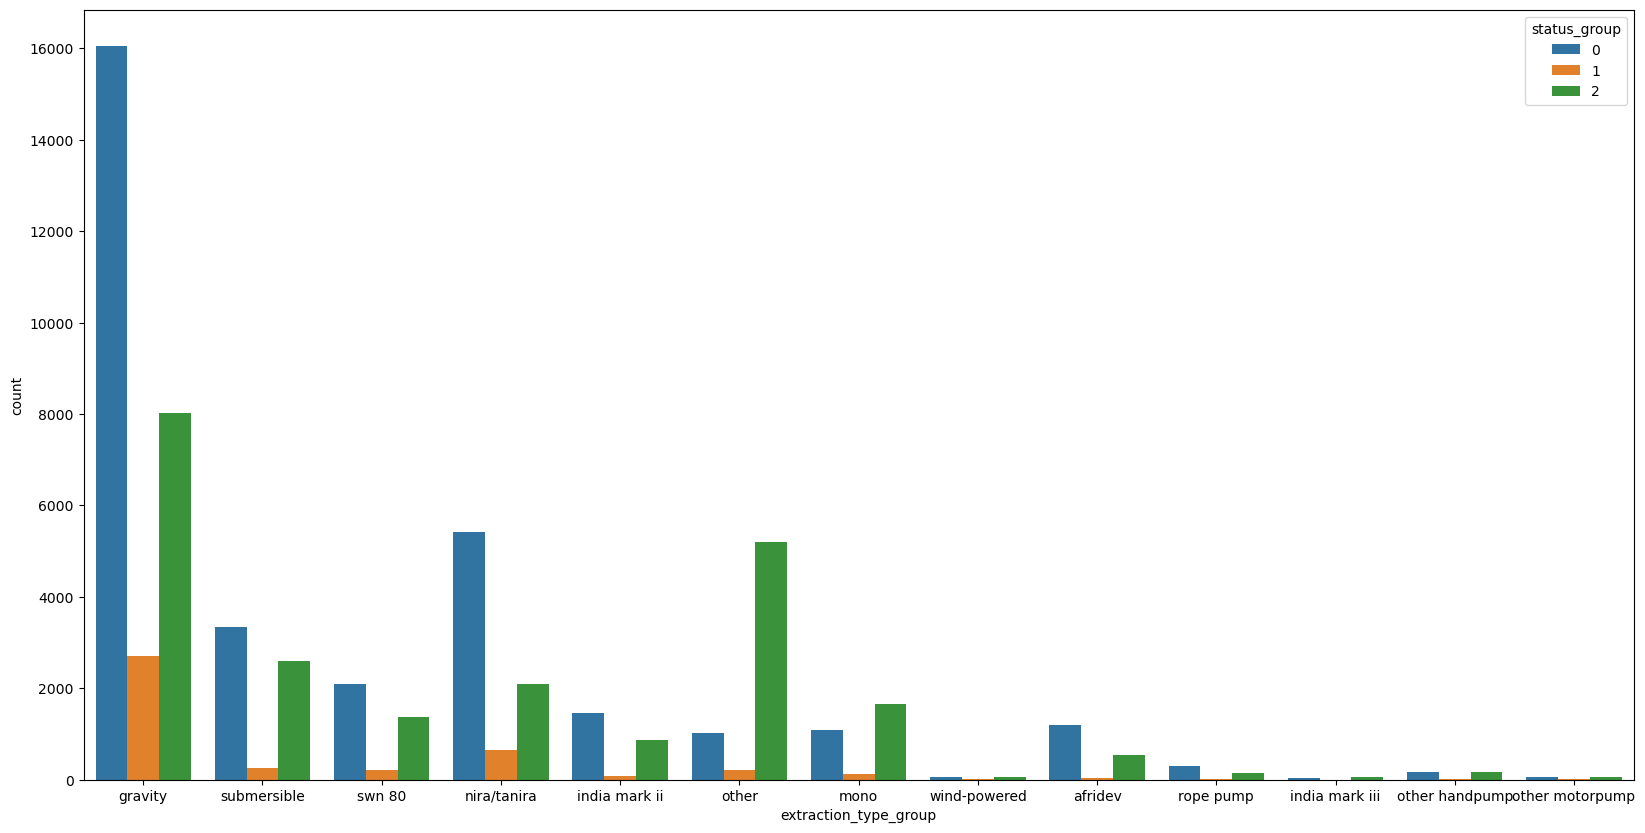

In [73]:
#distribution of extraction type group
plt.figure(figsize=(20,10))
ax = sns.countplot(x='extraction_type_group', hue="status_group", data=df)

In this case we can note that gravity has the hight number of functional water points but at the same time it also has the hight number of nonfunctional waterpoints

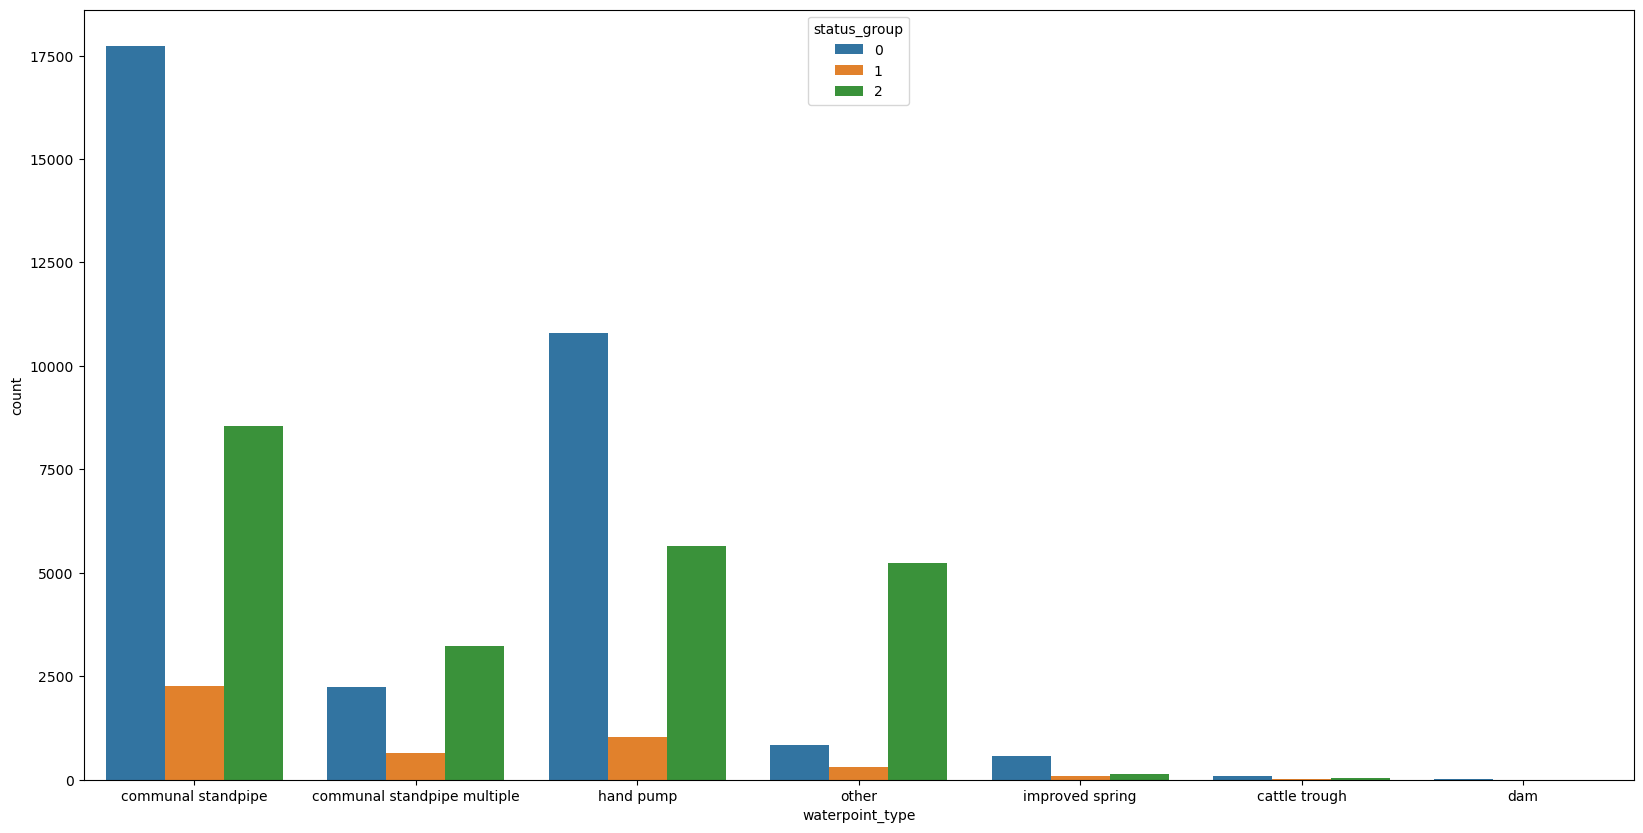

In [74]:
#taking a look at the ditribution of water type
plt.figure(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", data=df)

It can be seen that waterpoint type has correlation with funtionality of water points. Such that, communal standpipe has higher possibility to have functional, although communal standpipe multiple and others have higher possibility for non-functionality.

## Explorations

- Generally higher population areas has higher number of functional wells.
- Some areas has higher probability to find clean water especially, if they are near to good basins.
- Mostly the wells which are funded by government are non-functional.
- Most of water points which central government and district council installed are non-functional.
- The most common extraction type is gravity but second is hand pumps. The efficiency of handpumps are less than commercial pumps. It shows that authorities need to focus on pumping type. It is seen that, there are many non-functional water points which belongs to gravity (which is natural force so no need to do anything expensive) as extraction type. 
- Some water points which has enough and soft water are non-function.
- The wells which have constructed in recent years are functional than olders. And it is seen that recent years have some functional but needs repair wells. It means that if they will not be repaired recently, they will be non-functional easily.
- There are lots of water wells which has enough water are non-functional.

In [75]:
#create new csv file to keep our work and call new cleaned data.
df.to_csv('clean_data.csv')